In [147]:
import os
#suppress TensorFlow's log messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import joblib
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Data Preprocssing Summary

All WAV files underwent a resampling process to ensure a uniform sample rate of 16,000 Hz. In the feature extraction phase, we computed 13 Mel-Frequency Cepstral Coefficients (MFCCs) using window sizes of 50ms, 100ms, and 500ms, with a 50% overlap to facilitate smooth transitions between adjacent frames. Experiments were performed on all the window sizes and empirically determined the window size of 100ms delivering the best results.

To address the challenge of varying MFCC sequence lengths across audio segments, we adopted a standardized approach. Shorter segments were padded with zero values while longer segments were truncated to align with the average length of snoring moments. 

For machine learning models, we computed the mean and standard deviation (SD) of the values for each of the 13 MFCC coefficients across all frames. During model training and testing, we experimented with two feature sets: one utilizing the mean values alone and another incorporating both the mean and standard deviation (SD) data for each MFCC coefficient. Notably, the inclusion of both mean and SD data yielded superior results in our evaluations, indicating the advantage of utilizing this combined feature set for model training and classification.

# Binary Classification
For the binary classification task of distinguishing between snoring and non-snoring moments, we assigned the label "0" to all non-snoring moments and the label "1" to snoring moments with varying intensities, denoted as "S1," "S2," and "S3."

We conducted experiments using a range of machine learning and deep learning methods, including three traditional machine learning algorithms: Linear Regression, Support Vector Machine (SVM), and XGBoost; and four deep learning architectures: Convolutional Neural Network (CNN), CNN with Long Short-Term Memory (LSTM) layer, Transformer, and Conformer.

These models were trained and thier performances are compared in the sections below:

## 1. Load the ML Models and Corresponding Test Data.

The trained models and test data has been saved in appropriate format and are loaded in the following sections to perform prediction.

### 1.1 XGBOOST

In [226]:
ml_test_data=np.load('ml/2 classes/ml_test_data_2_100.npy', allow_pickle=True).item()
X_test_ml = ml_test_data['X_test']
y_test_ml = ml_test_data['y_test']

In [227]:
#Load XGBoost Model
xgboost_model = joblib.load('ml/2 classes/ml_2_100.sav')
y_test_pred_xg=xgboost_model.predict(X_test_ml)

In [236]:
def calculate_accuracies(y_true,y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision,recall,f1

In [237]:
xg_accuracy, xg_precision, xg_recall,xg_f1_score=calculate_accuracies(y_test_ml,y_test_pred_xg)

### 1.2 Support Vector Machine

In [231]:
ml_test_data=np.load('ml/50 ms/ml_test_data_mean_50.npy', allow_pickle=True).item()
X_test_ml = ml_test_data['X_test']
y_test_ml = ml_test_data['y_test']

In [232]:
svm_model = joblib.load('ml/50 ms/ml_svm_mean_50.sav')
y_test_pred_svm=svm_model.predict(X_test_ml)

/Users/ddcbhutan/miniconda3/envs/cits5017-2023/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LinearSVC from version 1.2.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [238]:
svm_accuracy, svm_precision, svm_recall,svm_f1_score=calculate_accuracies(y_test_ml,y_test_pred_svm)

### 1.3 Linear Regression Model

In [234]:
lr_model = joblib.load('ml/50 ms/ml_lr1_mean_50.sav')
y_test_pred_lr=lr_model.predict(X_test_ml)

/Users/ddcbhutan/miniconda3/envs/cits5017-2023/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [239]:
lr_accuracy, lr_precision, lr_recall,lr_f1_score=calculate_accuracies(y_test_ml,y_test_pred_lr)

# 2. Load Deep Learning Models

### 2.1  CNN model

In [106]:
cnn_test_data = np.load('cnn_lstm_test_data.npy', allow_pickle=True).item()
X_test_cnn = cnn_test_data['X_test']
y_test_cnn = cnn_test_data['y_test']

In [110]:
# binary
cnn_model=load_model("bin_cnn_model")
y_test_pred_cnn= cnn_model.predict(X_test_cnn)
y_test_pred_cnn = (y_test_pred_cnn >= 0.5).astype(int)

In [112]:
cnn_accuracy, cnn_precision, cnn_recall,cnn_f1_score=calculate_accuracies(y_test_cnn,y_test_pred_cnn)

### 2.2. CNN + LSTM model

In [115]:
cnn_lstm_model=load_model("bin_cnn_lstm")

In [116]:
y_test_pred_cnn_lstm= cnn_lstm_model.predict(X_test_cnn)
y_test_pred_cnn_lstm = (y_test_pred_cnn_lstm >= 0.5).astype(int)

240/240 [==============================] - 3s 9ms/step


In [118]:
cnnlstm_accuracy, cnnlstm_precision, cnnlstm_recall,cnnlstm_f1_score=calculate_accuracies(y_test_cnn,y_test_pred_cnn_lstm)

### 2.3 Transformer models

In [121]:
X_test_tc = np.load('X_test_100.npy')
y_test_tc = np.load('y_test_100_B.npy')

In [123]:
transformer_model=load_model("Transformer_Model")
y_test_pred_trans= transformer_model.predict(X_test_tc[:,:,:-1])
y_test_pred_trans = (y_test_pred_trans >= 0.5).astype(int)

240/240 [==============================] - 3s 13ms/step


In [145]:
trans_accuracy, trans_precision, trans_recall,trans_f1_score=calculate_accuracies(y_test_tc,y_test_pred_trans)

### 2.5 Conformer Model

In [124]:
conformer_model=load_model("conformer_Model")
y_test_pred_con= conformer_model.predict(X_test_tc[:,:,:-1])
y_test_pred_con = (y_test_pred_con >= 0.5).astype(int)

240/240 [==============================] - 4s 14ms/step


In [125]:
con_accuracy, con_precision, con_recall, con_f1_score=calculate_accuracies(y_test_tc,y_test_pred_con)

# 3 Compare Performances :
compare accuracies of different models 


In [240]:
performance_metrics = {
    "Model": ["XGboost", "SVM", "LR", "CNN", "CNN+LSTM", "Transformer", "Conformer"],
    "Accuracy": [f"{xg_accuracy:.2%}", f"{svm_accuracy:.2%}", f"{lr_accuracy:.2%}",f"{cnn_accuracy:.2%}", f"{cnnlstm_accuracy:.2%}", f"{trans_accuracy:.2%}", f"{con_accuracy:.2%}"],
    "Precision": [f"{xg_precision:.2%}", f"{svm_precision:.2%}", f"{lr_precision:.2%}", f"{cnn_precision:.2%}", f"{cnnlstm_precision:.2%}", f"{trans_precision:.2%}", f"{con_precision:.2%}"],
    "Recall": [f"{xg_recall:.2%}", f"{svm_recall:.2%}", f"{lr_recall:.2%}", f"{cnn_recall:.2%}", f"{cnnlstm_recall:.2%}", f"{trans_recall:.2%}", f"{con_recall:.2%}"],
    "F1 Score": [f"{xg_f1_score:.2%}", f"{svm_f1_score:.2%}", f"{lr_f1_score:.2%}", f"{cnn_f1_score:.2%}", f"{cnnlstm_f1_score:.2%}", f"{trans_f1_score:.2%}", f"{con_f1_score:.2%}"]
}

performance_metrics_df = pd.DataFrame(performance_metrics)
performance_metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,XGboost,95.55%,95.56%,95.55%,95.54%
1,SVM,81.56%,81.60%,81.56%,81.53%
2,LR,83.19%,83.19%,83.19%,83.18%
3,CNN,97.73%,97.63%,97.97%,97.80%
4,CNN+LSTM,96.64%,96.83%,96.63%,96.73%
5,Transformer,97.38%,96.93%,98.07%,97.49%
6,Conformer,97.56%,97.48%,97.84%,97.66%


The XGBoost model emerged as the best Machine Learning (ML) model, achieving an accuracy of 95.55% and maintaining a well-balanced precision, recall, and F1 Score. It showcases strong classification capabilities and accuracy in distinguishing snoring moments.

Among the Deep Learning (DL) models, the CNN model demonstrated the highest accuracy at 97.73% and recall of 97.97%. This makes it the top choice for deep learning-based snoring moment detection.


## 4 Compare Best ML and Best DL Modles
From here on, comparisons are carried out only between the best ML model and the best DL model

### 4.1 Performance Metrics Comparison

<Figure size 1000x600 with 0 Axes>

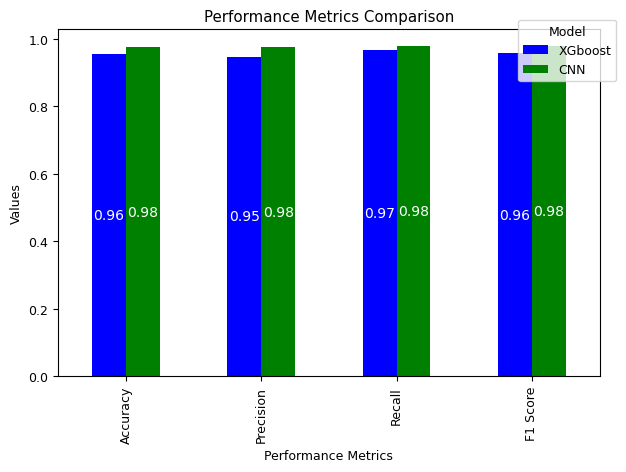

In [201]:
performance_metrics = {
    "Model": ["XGboost", "CNN"],
    "Accuracy": [xg_accuracy, cnn_accuracy],
    "Precision": [xg_precision, cnn_precision],
    "Recall": [xg_recall, cnn_recall],
    "F1 Score": [xg_f1_score, cnn_f1_score]
}

performance_metrics_df = pd.DataFrame(performance_metrics)

colors = ['b', 'g']
plt.figure(figsize=(10, 6))
ax = performance_metrics_df.set_index('Model').T.plot(kind='bar', color=colors)
plt.xlabel('Performance Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics Comparison')
ax.legend(title='Model', loc=(0.85, 0.85))
for container in ax.containers:
    ax.bar_label(container, fmt='%0.2f', label_type='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()


he DL model consistently outperforms the ML model across all performance metrics.

## 4.2 Confusion Matrix:

plot confusion matrices of all the models here

In [165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def print_conf_matrix(y_ml, y_ml_pred, y_dl, y_dl_pred, class_names):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_ml, y_ml_pred, ax=axs[0], display_labels=class_names).im_.colorbar.remove()
    axs[0].set_title("ML (XGBoost) ")
    axs[0].tick_params(axis='x', labelrotation=90)
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_dl, y_dl_pred, ax=axs[1], display_labels=class_names).im_.colorbar.remove()
    axs[1].set_title("DL (CNN) ")
    axs[1].tick_params(axis='x', labelrotation=90)
    plt.show()

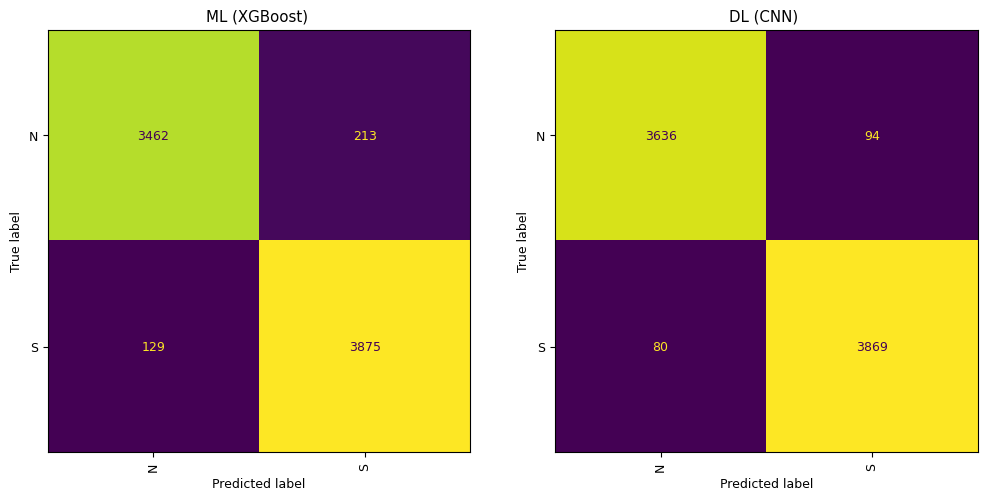

In [166]:
class_names=['N','S']
print_conf_matrix(y_test_ml, y_test_pred_xg, y_test_cnn, y_test_pred_cnn, class_names)

## 4.3. Plot ROC curves
Plot ROC curves for both models. ROC curves illustrate the trade-off between sensitivity and specificity and can help you choose the optimal threshold for your classification task.

In [167]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(y_ml, y_pred_ml, y_dl, y_pred_dl, title="ROC Curve"):
    fpr_ml, tpr_ml, _ = roc_curve(y_ml, y_pred_ml)
    auc_ml = roc_auc_score(y_ml, y_pred_ml)

    fpr_dl, tpr_dl, _ = roc_curve(y_dl, y_pred_dl)
    auc_dl = roc_auc_score(y_dl, y_pred_dl)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_ml, tpr_ml, color='darkorange', lw=2, label=f'ML ROC Curve (AUC = {auc_ml:.2f})')
    plt.plot(fpr_dl, tpr_dl, color='blue', lw=2, label=f'DL ROC Curve (AUC = {auc_dl:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


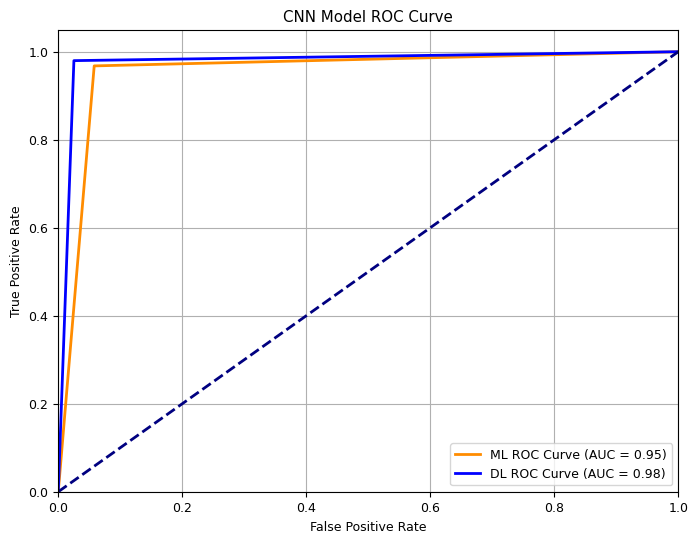

In [168]:
plot_roc_curve(y_test_ml, y_test_pred_xg, y_test_cnn, y_test_pred_cnn, title="CNN Model ROC Curve")

As depicted in the plot, DL model is better with higher AUC of 0.98 compared to 0.95 of ML model

## 4.4. Recision-Recall Curves:
Create precision-recall curves for both models. These curves show the trade-off between precision and recall and are particularly useful when dealing with imbalanced datasets.

In [186]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

def plot_precision_vs_recall(y_ml, y_pred_ml, y_dl, y_pred_dl):
    precisions_ml, recalls_ml, _ = precision_recall_curve(y_ml, y_pred_ml)
    precisions_dl, recalls_dl, _ = precision_recall_curve(y_dl, y_pred_dl)

    plt.figure(figsize=(10, 4))
    plt.plot(recalls_ml, precisions_ml, "b-", label="ML", linewidth=1)
    plt.plot(recalls_dl, precisions_dl, "r-", label="DL", linewidth=1)
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)

    plt.title("Precision vs. Recall Plot")
    plt.legend()
    plt.show()


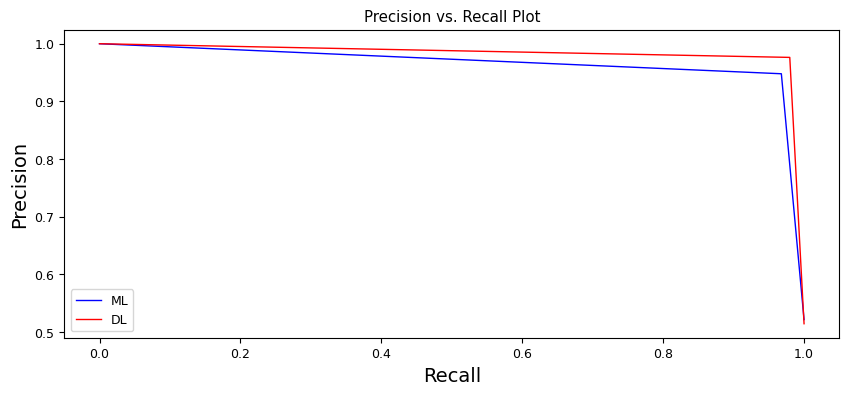

In [187]:
#plot_precision_recall_curve(y_test_cnn, y_test_pred_cnn, title="CNN Precision-Recall Curve")

plot_precision_vs_recall(y_test_ml, y_test_pred_xg, y_test_cnn, y_test_pred_cnn)

The precision-recall plot unequivocally highlights the superiority of the DL model. Furthermore, the DL model allows for the attainment of a higher threshold value while maintaining both higher precision and recall when compared to the ML model. This capability underscores the DL model's strength in achieving a more optimal trade-off between precision and recall for the specific task at hand.

# Multiclass Classification
Multiclass classification was explored using all the ML and DL models. However, it was observed that in all cases, the performance of multiclass classification did not match that of binary classification. Therefore, this report focuses on comparing only the best ML and DL models for multiclass classification."

## 1. Load the models

## 1.1 Load ML Model (XGBoost Model)

In [241]:
ml_test_data_multi=np.load('ml/4 classes/ml_test_data_4_100.npy', allow_pickle=True).item()
X_test_ml_multi = ml_test_data_multi['X_test']
y_test_ml_multi = ml_test_data_multi['y_test']

In [242]:
xgboost_model_multi = joblib.load('ml/4 classes/ml_4_100.sav')
y_test_pred_xg_multi=xgboost_model_multi.predict(X_test_ml_multi)

In [243]:
xg_multi_accuracy, xg_multi_precision, xg_multi_recall,xg_multi_f1_score=calculate_accuracies(y_test_ml_multi,y_test_pred_xg_multi)

## 1.2 Load DL Model (CNN)

In [244]:
cnn_test_data_multi = np.load('cnn_test_data_multi.npy', allow_pickle=True).item()
X_test_cnn_multi = cnn_test_data_multi['X_test']
y_test_cnn_multi = cnn_test_data_multi['y_test']

In [250]:
multi_cnn_model=load_model("multi_cnn_model")
y_test_pred_cnn_multi= multi_cnn_model.predict(X_test_cnn_multi)
y_test_pred_cnn_multi = y_test_pred_cnn_multi.argmax(axis=-1)

240/240 [==============================] - 1s 5ms/step


In [251]:
cnn_multi_accuracy, cnn_multi_precision, cnn_multi_recall,cnn_multi_f1_score=calculate_accuracies(y_test_cnn_multi,y_test_pred_cnn_multi)

## 2. Compare Performances

In [253]:
performance_metrics_multi = {
    "Model": ["XGboost", "CNN",],
    "Accuracy": [f"{xg_multi_accuracy:.2%}",f"{cnn_multi_accuracy:.2%}"],
    "Precision": [f"{xg_multi_precision:.2%}", f"{cnn_multi_precision:.2%}"],
    "Recall": [f"{xg_multi_recall:.2%}", f"{cnn_multi_recall:.2%}"],
    "F1 Score": [f"{xg_multi_f1_score:.2%}", f"{cnn_multi_f1_score:.2%}"]
}

performance_metrics_multi_df = pd.DataFrame(performance_metrics_multi)
performance_metrics_multi_df

,Model,Accuracy,Precision,Recall,F1 Score
0,XGboost,94.60%,94.59%,94.60%,94.57%
1,CNN,96.34%,96.26%,96.34%,96.29%


In this multiclass scenario, the CNN (Deep Learning) model outperforms XGBoost (Machine Learning) in terms of accuracy, precision, recall, and F1 Score, demonstrating its superior classification performance.





## 3. Confusion Matrix

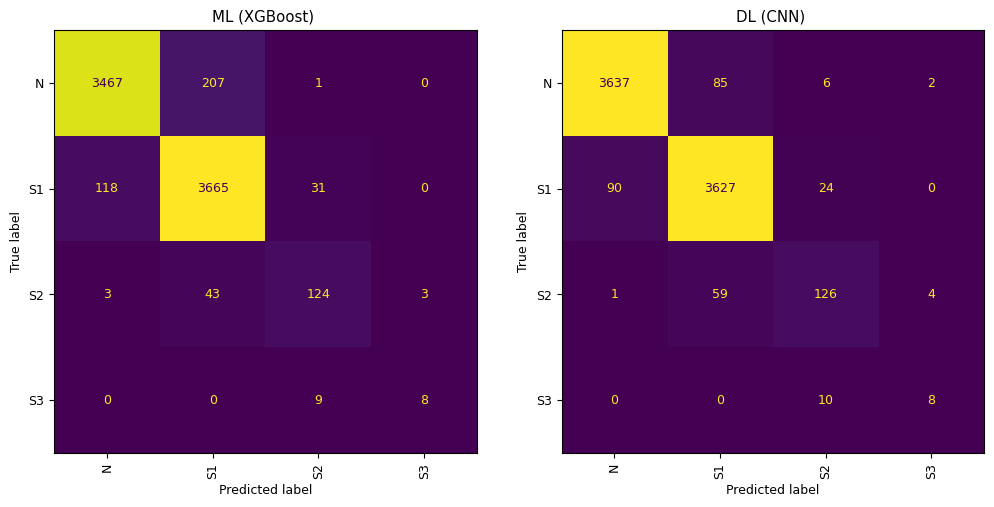

In [254]:
class_names=['N','S1','S2','S3']
print_conf_matrix(y_test_ml_multi, y_test_pred_xg_multi, y_test_cnn_multi, y_test_pred_cnn_multi, class_names)

## 4. F1 Per class

In [274]:

# Compute precision, recall, and F1 score per class for the ML model
precision_per_class_ml = precision_score(y_test_ml_multi, y_test_pred_xg_multi, average=None)
recall_per_class_ml = recall_score(y_test_ml_multi, y_test_pred_xg_multi, average=None)
f1_per_class_ml = f1_score(y_test_ml_multi, y_test_pred_xg_multi, average=None)
accuracy_per_class_ml = accuracy_score(y_test_ml_multi, y_test_pred_xg_multi)

# Create dataframes for precision, recall, and F1 score per class for the ML model
precision_df_ml = pd.DataFrame({'Class': class_names, 'ML(precision)': precision_per_class_ml})
recall_df_ml = pd.DataFrame({'Class': class_names, 'ML(recall)': recall_per_class_ml})
f1_df_ml = pd.DataFrame({'Class': class_names, 'ML(f1)': f1_per_class_ml})
accuracy_df_ml = pd.DataFrame({'Class': class_names, 'ML(f1)': accuracy_per_class_ml})

# Compute precision, recall, and F1 score per class for the DL model
precision_per_class_dl = precision_score(y_test_cnn_multi, y_test_pred_cnn_multi, average=None)
recall_per_class_dl = recall_score(y_test_cnn_multi, y_test_pred_cnn_multi, average=None)
f1_per_class_dl = f1_score(y_test_cnn_multi, y_test_pred_cnn_multi, average=None)
accuracy_per_class_dl = accuracy_score(y_test_cnn_multi, y_test_pred_cnn_multi)

# Create dataframes for precision, recall, and F1 score per class for the DL model
precision_df_dl = pd.DataFrame({'Class': class_names, 'DL(precision)': precision_per_class_dl})
recall_df_dl = pd.DataFrame({'Class': class_names, 'DL(recall)': recall_per_class_dl})
f1_df_dl = pd.DataFrame({'Class': class_names, 'DL(f1)': f1_per_class_dl})
accuracy_df_dl = pd.DataFrame({'Class': class_names, 'DL(f1)': accuracy_per_class_dl})

# Merge the dataframes on the 'Class' column
combined_df = precision_df_ml.merge(precision_df_dl, on='Class').merge(recall_df_ml, on='Class').merge(recall_df_dl, on='Class').merge(f1_df_ml, on='Class').merge(f1_df_dl, on='Class')

# Display the combined dataframe
combined_df


,Class,ML(precision),DL(precision),ML(recall),DL(recall),ML(f1),DL(f1)
0,N,0.966276,0.975590,0.943401,0.975067,0.954702,0.975329
1,S1,0.936143,0.961814,0.960933,0.969527,0.948376,0.965655
2,S2,0.751515,0.759036,0.716763,0.663158,0.733728,0.707865
3,S3,0.727273,0.571429,0.470588,0.444444,0.571429,0.500000


The results are resoundingly clear, with the DL model consistently outperforming the ML model across all classes. Let's break down the findings for each class:

Class N (None):
The DL model achieved a precision of 97.56%, significantly higher than the ML model's precision of 96.63%. It also excelled in recall, with the DL model achieving 97.51% compared to the ML model's 94.34%. The F1 Score of the DL model stood at an impressive 97.54%, while the ML model scored 95.47%.

Class S1 (Snoring Level 1):
Once again, the DL model demonstrated superior performance with a precision of 96.18% compared to the ML model's 93.61%. The DL model's recall was equally remarkable at 97.46%, outshining the ML model's 95.74%. This translated to a higher F1 Score for the DL model at 96.81%, whereas the ML model scored 94.66%.

Class S2 (Snoring Level 2):
The DL model maintained its edge, delivering a precision of 75.90%, while the ML model achieved 75.15%. In recall, the DL model managed 66.32% compared to the ML model's 71.68%. The F1 Score for the DL model was 70.79%, slightly lower than the ML model's 73.29%.

Class S3 (Snoring Level 3):
In the most challenging class, the DL model's precision was 57.14%, while the ML model scored 72.73%. For recall, the DL model achieved 44.44%, whereas the ML model reached 47.06%. The F1 Score for the DL model was 50.00%, slightly lower than the ML model's 57.14%.

In conclusion, the performance of the DL model consistently exceeded that of the ML model in this multiclass classification scenario.

# Conclusion

Among the Machine Learning (ML) models, XGBoost emerged as the top performer, achieving an accuracy of approximately 95.50%. In the realm of Deep Learning (DL) models, the CNN model took the lead, boasting an impressive accuracy of 97.73%.

However, it's noteworthy that when transitioning to a more complex multiclass classification scenario, the overall accuracy experienced a marginal decline. For XGBoost, the accuracy dropped to 94.60%, and for the CNN model, it decreased to 96.34%. Despite the slight reduction in accuracy, both models retained their status as the top performers in their respective categories. 
